In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [35]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv')

# 1. ****How big is the data****

In [36]:
df.shape

(418, 12)

# How does the data look like?

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
df.sample(5)
# ye random 5 rows dega

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
113,1005,1,3,"Buckley, Miss. Katherine",female,18.5,0,0,329944,7.2833,NaN,Q
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
169,1061,1,3,"Hellstrom, Miss. Hilda Maria",female,22.0,0,0,7548,8.9625,NaN,S
384,1276,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
286,1178,0,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S


# What is the data type of columns?

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


yahan pr hum age ke data type ko float se int me convert kr skte hai. it will reduce the memory usage

# Are there any missing values?

In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# How does the data look mathematically ?

In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Are there any duplicate values?

In [42]:
df.duplicated().sum()

0

# How is the correlation between col?

In [43]:
# this is used to find ki konse col o/p ko affect kr rhe hai, knse nhi. to help feed specific col in dataset
df.corr()

/tmp/ipykernel_32/2763044689.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [44]:
df.corr()['Survived']

/tmp/ipykernel_32/2226390551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Survived']


PassengerId   -0.023245
Survived       1.000000
Pclass        -0.108615
Age           -0.000013
SibSp          0.099943
Parch          0.159120
Fare           0.191514
Name: Survived, dtype: float64

try to derive the fact that fare has a strong corr with survival, which is true. high class people were preferred to be saved first.

then Pclass ke sath kafi neg corr hai, mtlb jiase jaise class badh rha hai (1,2,3) servival kam rha

# **EDA**

# Categorical Data

In [45]:
import seaborn as sns

# **a. Countplot**

<Axes: xlabel='Survived', ylabel='count'>

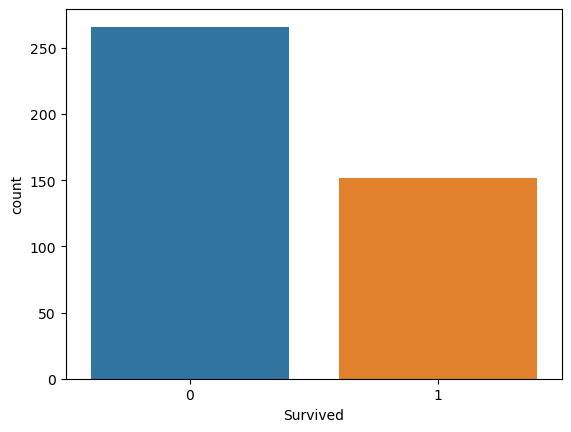

In [46]:
sns.countplot(data = df, x = 'Survived')
#df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Pclass', ylabel='count'>

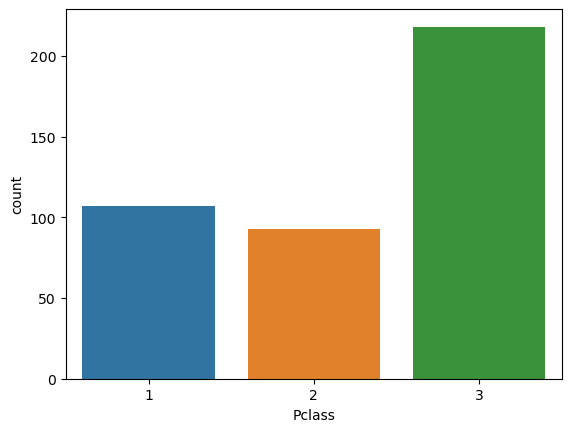

In [47]:
df['Pclass'] = df['Pclass'].astype('category')
sns.countplot(data=df, x='Pclass')


<Axes: xlabel='Embarked', ylabel='count'>

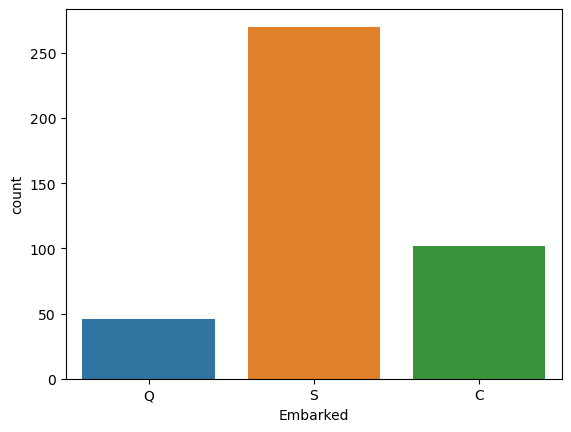

In [48]:
sns.countplot(data=df, x='Embarked')

# Piechart

<Axes: ylabel='Survived'>

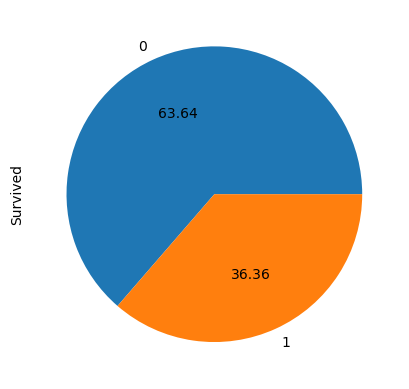

In [49]:
df['Survived'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Pclass'>

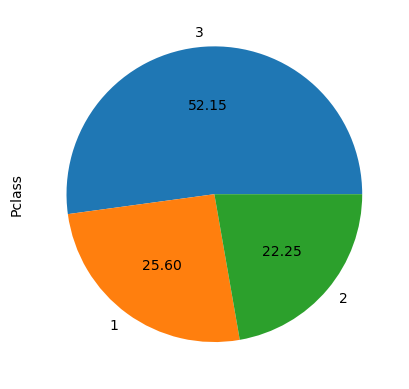

In [50]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')

#  **Numerical Data**

# **a.Histogram**

In [51]:
import matplotlib.pyplot as plt

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

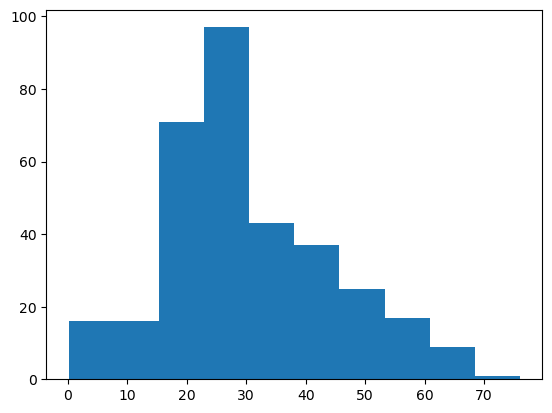

In [52]:
plt.hist(df['Age'], bins = 10)
# we can change the bin size here

# **b. Distplot**

/tmp/ipykernel_32/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

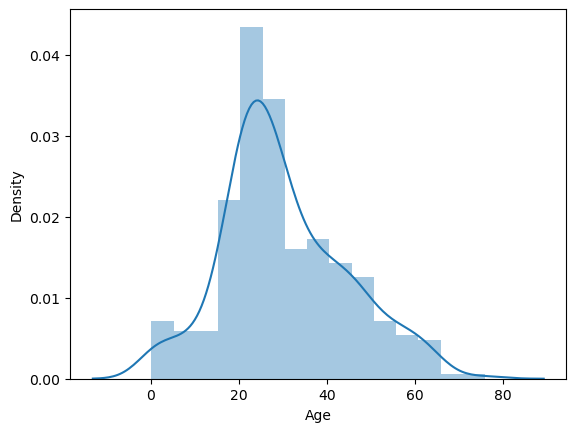

In [53]:
sns.distplot(df['Age'])

# **c. Boxplot**

<Axes: xlabel='Fare'>

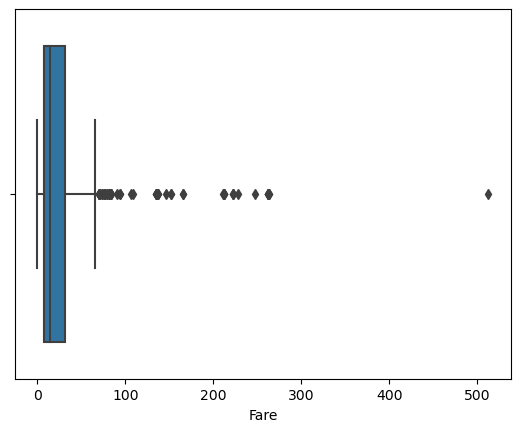

In [54]:
sns.boxplot(data=df, x='Fare')

<Axes: xlabel='Age'>

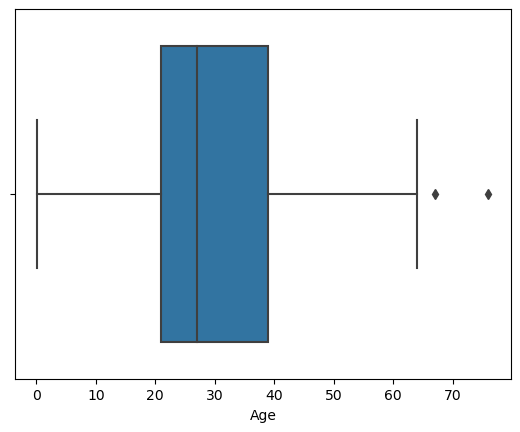

In [55]:
sns.boxplot(data=df, x='Age')

In [56]:
df['Age'].min()

0.17

In [57]:
df['Age'].max()

76.0

In [58]:
df['Age'].mean()

30.272590361445783

In [59]:
# data me skewness nikalne ke liye
df['Age'].skew()

0.4573612871503845

# # **Bivariate and Multivariate Analysis**

Here we will load some other datasets to in order to do the analysis. 

In [60]:
tips = sns.load_dataset('tips')

In [61]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
titanic = pd.read_csv('/kaggle/input/test-file/tested.csv')

In [63]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
flights = sns.load_dataset('flights')

In [65]:
iris = sns.load_dataset('iris')

In [66]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [67]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Bivariate Analysis**

# 1. Scatterplot (Numerical - Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

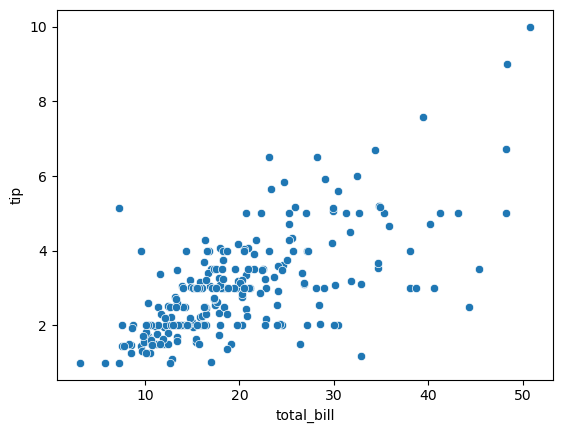

In [68]:
sns.scatterplot(x = tips['total_bill'],y = tips['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

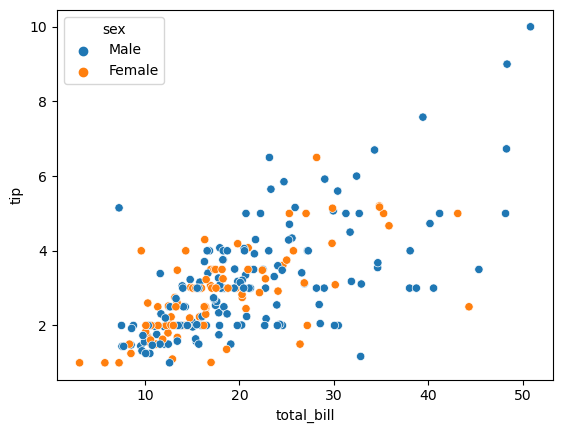

In [69]:
# ab same plot me multivariate analysis bhi kr skte hai. 
#for eg, we wish to know the gender as well

sns.scatterplot(x = tips['total_bill'],y = tips['tip'], hue = tips['sex'])

<Axes: xlabel='total_bill', ylabel='tip'>

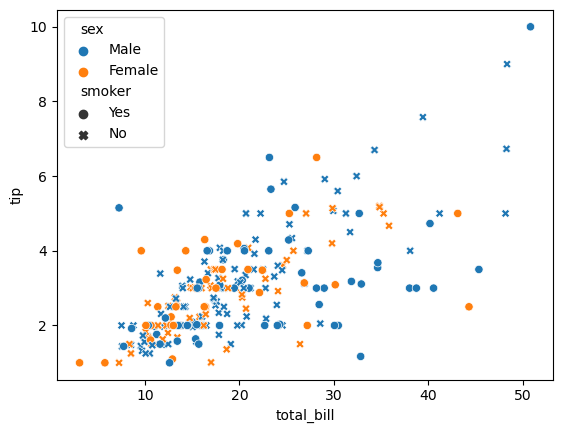

In [70]:
# 4 values ka analysis
sns.scatterplot(x = tips['total_bill'],y = tips['tip'], hue = tips['sex'], style = tips['smoker'])

<Axes: xlabel='total_bill', ylabel='tip'>

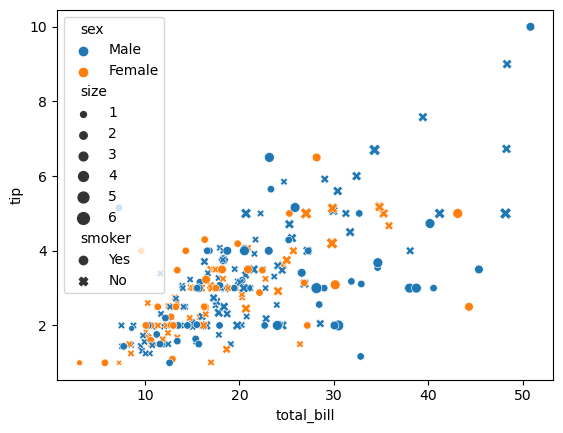

In [71]:
# 5 values ka analysis
sns.scatterplot(x = tips['total_bill'],y = tips['tip'], hue = tips['sex'], style = tips['smoker'], size = tips['size'])

# Bar Plot (Numerical - Categorical)

In [72]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Pclass', ylabel='Fare'>

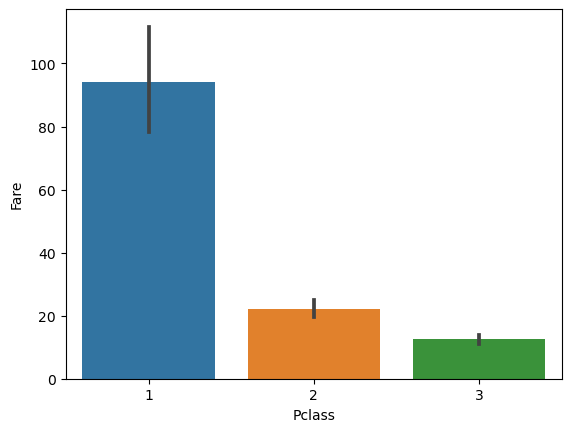

In [73]:
# suppose I wish to find the avg fare of travelling in every class.

sns.barplot(x = titanic['Pclass'] , y = titanic['Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

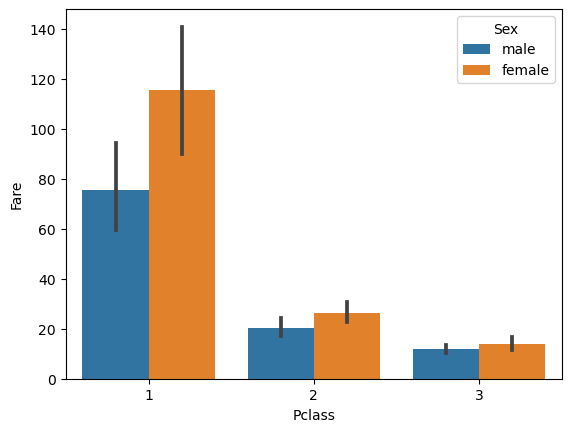

In [74]:
# to make this multivariate

sns.barplot(x = titanic['Pclass'] , y = titanic['Fare'] , hue = titanic['Sex'])

# 3. Box Plot (Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

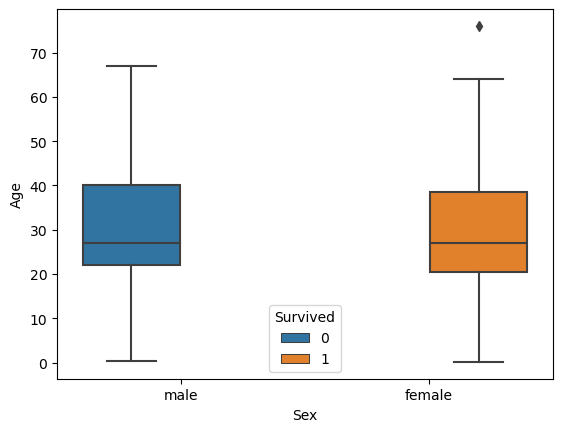

In [75]:
sns.boxplot(x=titanic['Sex'], y=titanic['Age'], hue = titanic['Survived'])

# Distplot (Numerical - Categorical)

/tmp/ipykernel_32/3795946177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==0]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

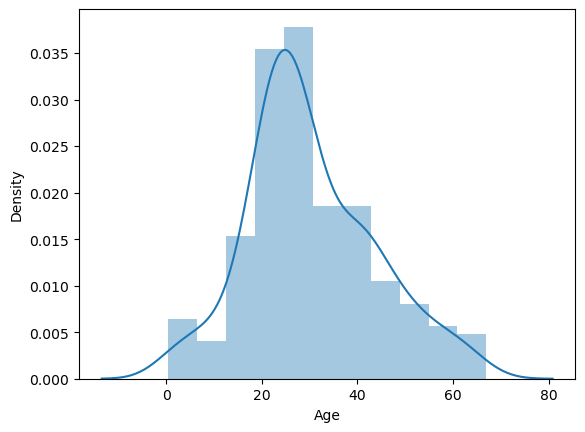

In [76]:
# the density of age graph for the people who did not survived
sns.distplot(titanic[titanic['Survived']==0]['Age'])

/tmp/ipykernel_32/1913158307.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==0]['Age'], hist = False)
/tmp/ipykernel_32/1913158307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==1]['Age'], hist = False)


<Axes: xlabel='Age', ylabel='Density'>

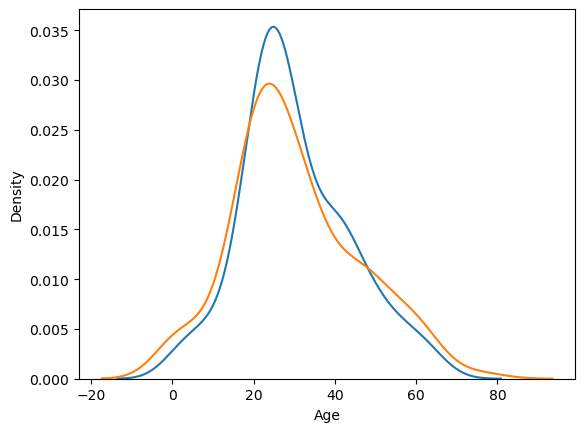

In [77]:
sns.distplot(titanic[titanic['Survived']==0]['Age'], hist = False)
sns.distplot(titanic[titanic['Survived']==1]['Age'], hist = False)

blue = probability of dying.  
Orange = probability of surviving

>> read the graph - for smaller age, the probability of survival is more than probability of death.
>> isme hum ek numerical quantity (age) aur ek categorical quantity (survived) ke beech ka relation dekh rhe hai


# HeatMap (categorical - categorical)

In [78]:
pd.crosstab(titanic['Pclass'] , titanic['Survived'])

Survived,0,1
Pclass,,
1,57,50
2,63,30
3,146,72


<Axes: xlabel='Survived', ylabel='Pclass'>

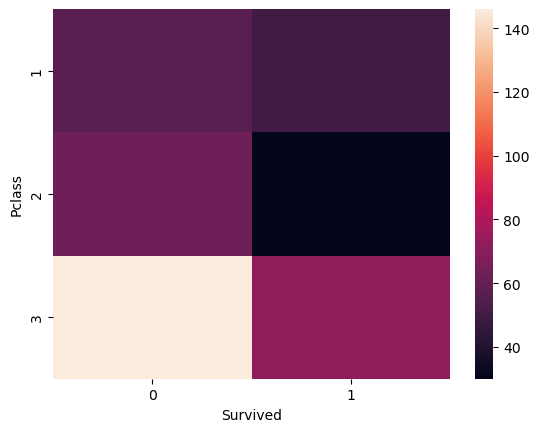

In [79]:
sns.heatmap(pd.crosstab(titanic['Pclass'] , titanic['Survived']))

In [80]:
# to get the percentage of people who survived in every class
titanic.groupby('Pclass').mean()['Survived']*100

/tmp/ipykernel_32/146536759.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Pclass').mean()['Survived']*100


Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

/tmp/ipykernel_32/2357744593.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (titanic.groupby('Pclass').mean()['Survived']*100).plot(kind = 'bar')


<Axes: xlabel='Pclass'>

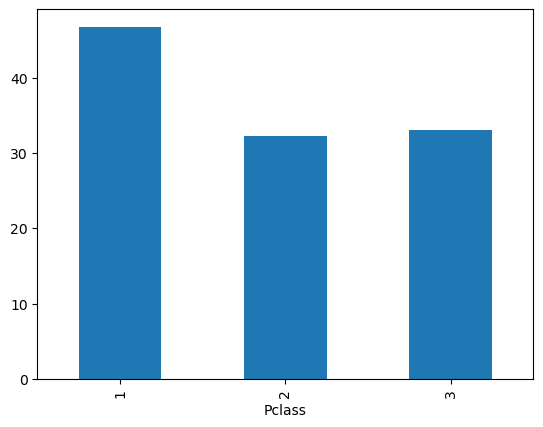

In [81]:
(titanic.groupby('Pclass').mean()['Survived']*100).plot(kind = 'bar')

In [82]:
# this will give the % of women and men who survived 
titanic.groupby('Sex').mean()['Survived']*100

/tmp/ipykernel_32/2997131272.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Sex').mean()['Survived']*100


Sex
female    100.0
male        0.0
Name: Survived, dtype: float64

In [83]:
titanic.groupby('Embarked').mean()['Survived']*100

/tmp/ipykernel_32/1184324873.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Embarked').mean()['Survived']*100


Embarked
C    39.215686
Q    52.173913
S    32.592593
Name: Survived, dtype: float64

# ClusterMap (categorical - categorical)

In [84]:
pd.crosstab(titanic['SibSp'], titanic['Survived'])

Survived,0,1
SibSp,,
0,195,88
1,56,54
2,8,6
3,3,1
4,3,1
5,0,1
8,1,1


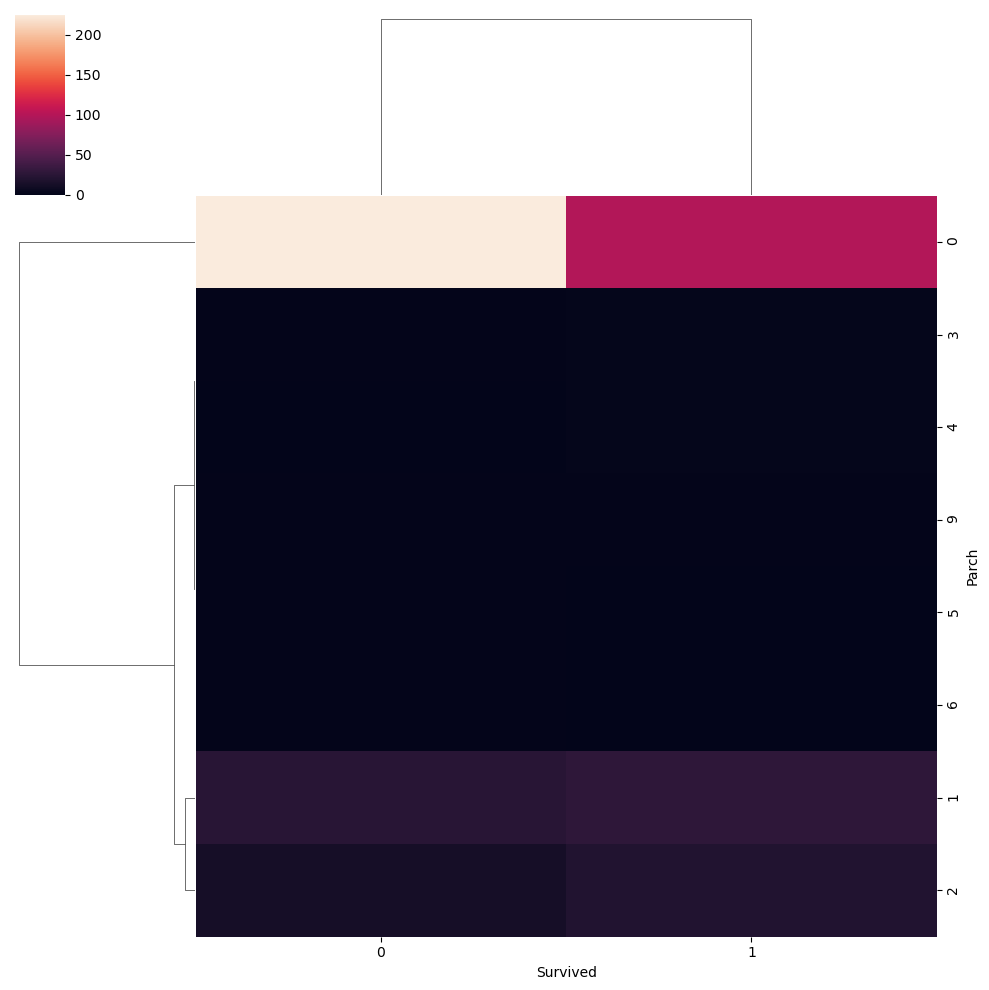

In [85]:
sns.clustermap(pd.crosstab(titanic['Parch'], titanic['Survived']))

- clustermap values ke beech me closeness batata hai

# 7. Pairplot

- collection of scatterplots
- har num col ka har doosre num col ke sath scatterplot banana hai
- a dataset with more numerical columns, this plot can be used to visualize relation between every numerical column with every other numerical col.

In [86]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


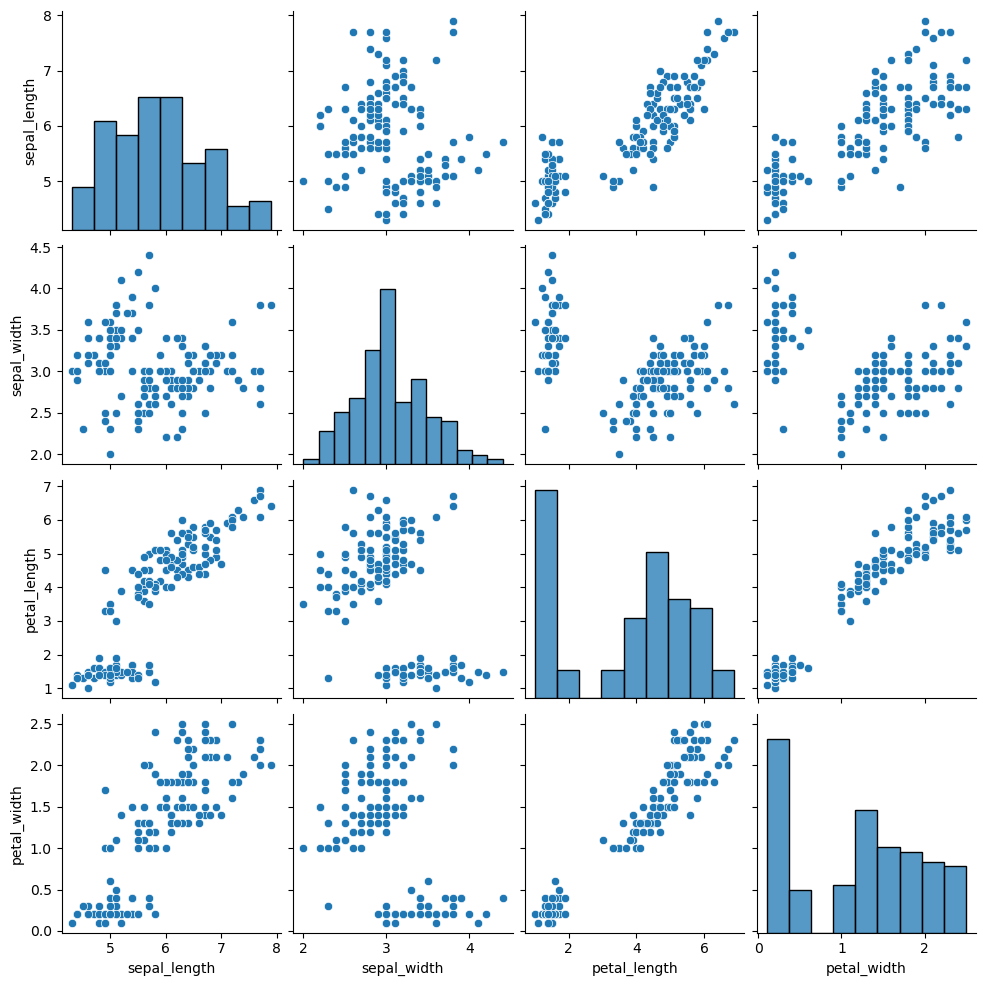

In [87]:
sns.pairplot(iris)

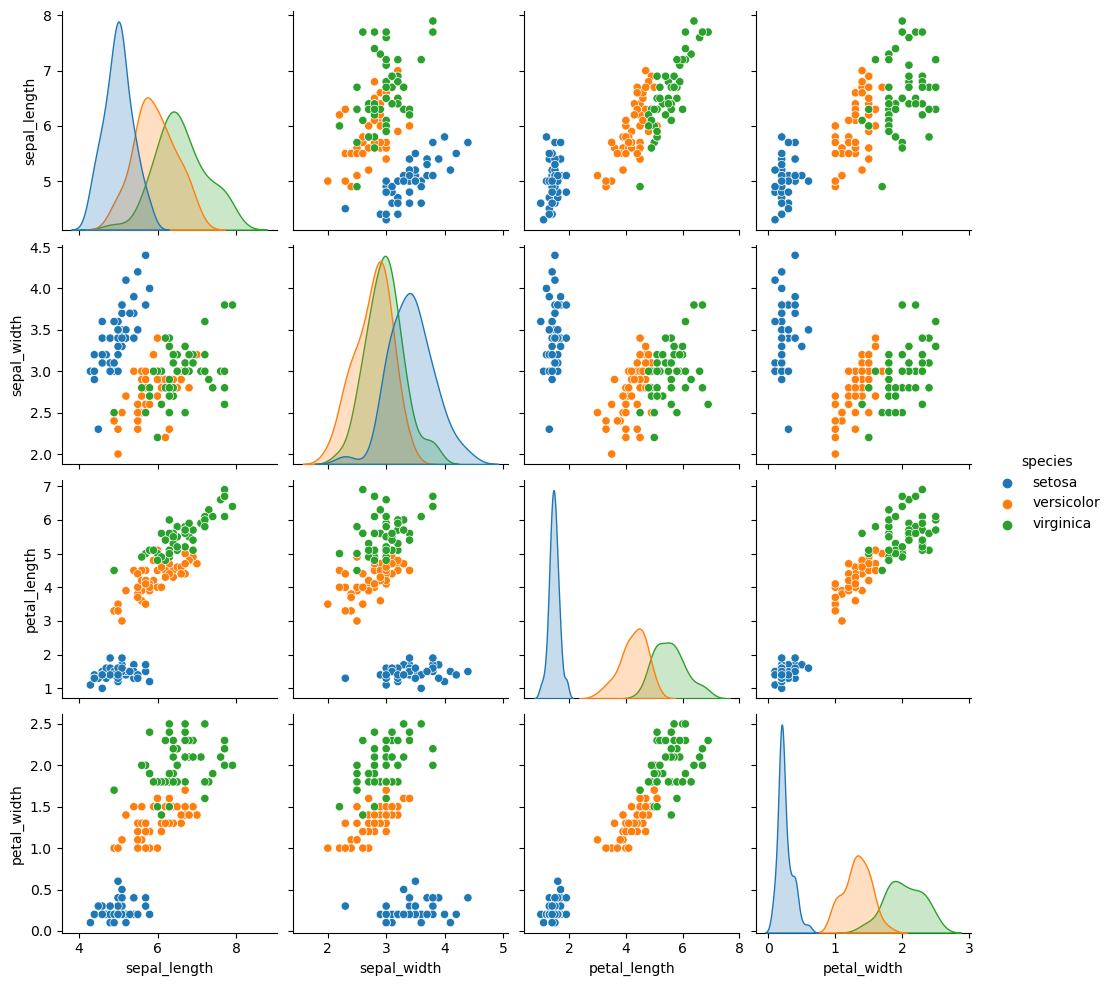

In [88]:
sns.pairplot(iris, hue ='species')

# 8. Lineplot (Numerical - Numerical)

- especial case of scatterplot
- x axis ki quantity time based hai

In [89]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [90]:
new = flights.groupby('year').sum().reset_index()
# ye isliye kiya kyuki har saal me 12 months hai toh summation

/tmp/ipykernel_32/3194537309.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new = flights.groupby('year').sum().reset_index()


<Axes: xlabel='year', ylabel='passengers'>

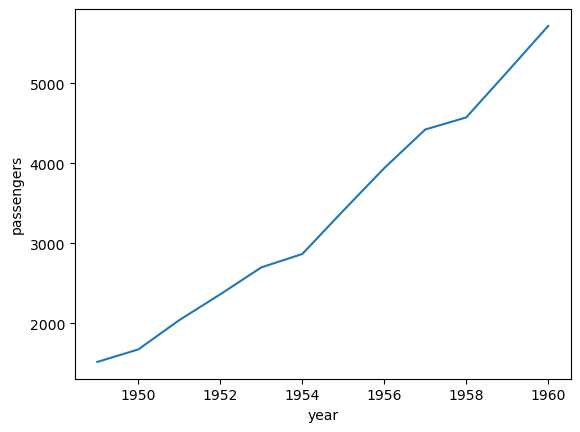

In [91]:
sns.lineplot( x =new['year'],y= new['passengers'])

In [92]:
flights.pivot_table(values = 'passengers', index = 'month', columns='year' )

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

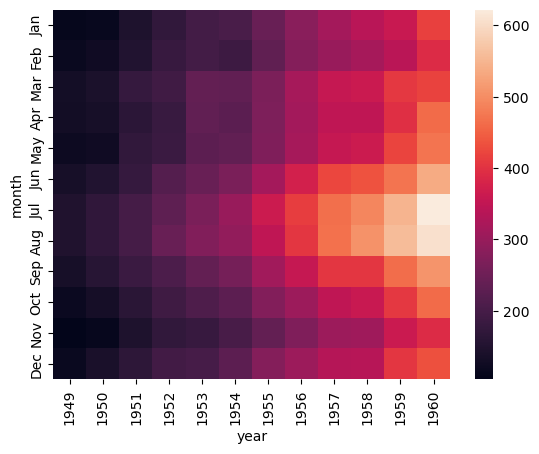

In [93]:
sns.heatmap(flights.pivot_table(values = 'passengers', index = 'month', columns='year' ))

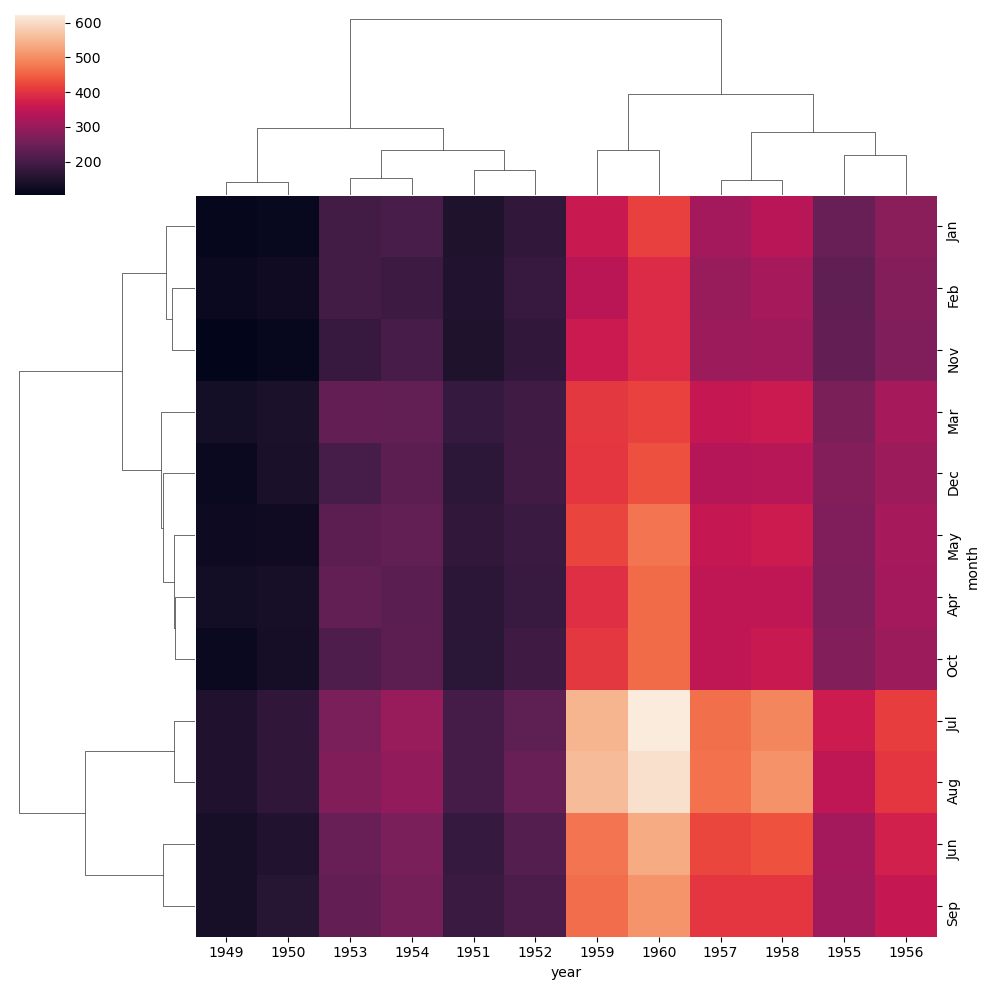

In [94]:
sns.clustermap(flights.pivot_table(values = 'passengers', index = 'month', columns='year' ))